Installing CDT.

In [1]:
%%capture
!pip install cdt

Loading R extension for Jupyter Lab.

In [2]:
%load_ext rpy2.ipython

Installing R packages required by CDT. It will take a moment...

In [3]:
%%capture
%%R
options(Ncpus = parallel::detectCores())
system("sudo apt install -y libgsl-dev", intern=TRUE)
install.packages(c("devtools", "pcalg", "kpcalg", "SID"))
devtools::install_github("Diviyan-Kalainathan/RCIT")

Disabling warnings.

In [4]:
import warnings
warnings.filterwarnings("ignore")

Importing packages.

In [5]:
import cdt
import networkx as nx

# Causal Discovery with the Toolbox (CDT)

By Alessio Zanga & Fabio Stella

## Abstract

This notebook represents a quick-start guide to causal discovery using the Causal Discovery Toolbox package.

## Generate a Dataset

Import a dataset generator.

In [6]:
from cdt.data import AcyclicGraphGenerator

Construct the generator given input parameters.

In [7]:
generator = AcyclicGraphGenerator(
    causal_mechanism = 'linear',   # Type of functions in the functional set F (see Structural Causal Models).
    noise = 'gaussian',            # Type of noise terms of the set of hidden variables U.
    nodes = 10,                    # Cardinality of the set of observed variables V.
    parents_max = 2,               # Max number of parents per node.
    npoints = int(1e6),            # Sample size.
)

Sample from the generator.

In [8]:
data, true_graph = generator.generate()

It returns a Pandas DataFrame and a Networkx directed acyclic graph.

In [9]:
type(data), type(true_graph)

(pandas.core.frame.DataFrame, networkx.classes.digraph.DiGraph)

In [10]:
data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
mean,6.796768e-16,-8.014922e-17,1.307399e-18,-7.090648e-16,9.674750e-17,3.596199e-16,-1.616627e-16,1.338947e-16,6.250502e-16,2.913438e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-4.491429e+00,-4.600853e+00,-4.593280e+00,-4.852635e+00,-2.425644e+00,-4.605391e+00,-2.117112e+00,-4.857034e+00,-4.086772e+00,-4.709643e+00
25%,-6.489129e-01,-6.736226e-01,-6.738895e-01,-6.736345e-01,-9.450260e-01,-6.739491e-01,-1.214764e+00,-6.734687e-01,-6.895486e-01,-6.741828e-01
50%,-1.901525e-02,4.100325e-04,5.965794e-04,1.447564e-04,2.673667e-01,6.611892e-04,1.319768e-01,5.864984e-04,-3.320479e-02,-1.304308e-04
75%,7.591482e-01,6.740893e-01,6.742649e-01,6.763850e-01,9.002388e-01,6.746710e-01,9.196885e-01,6.754570e-01,6.233915e-01,6.735375e-01
max,3.563736e+00,5.102066e+00,5.126792e+00,4.929636e+00,2.375303e+00,5.103290e+00,1.925120e+00,4.774560e+00,4.786599e+00,4.606204e+00


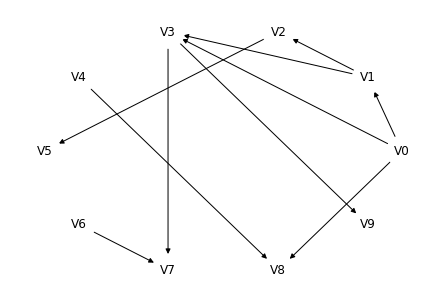

In [11]:
def _draw(G):
    nx.draw_circular(G, node_size=1000, node_color="white", with_labels=True)

_draw(true_graph)

## Learn a structure

Import a learning algorithm.

In [12]:
from cdt.causality.graph import PC

Build a discover.

In [13]:
discover = PC(
    CItest = "gaussian",     # Conditional independence test type.
    alpha = 0.01,            # Significance level alpha.
)

Run the discovery algorithm.

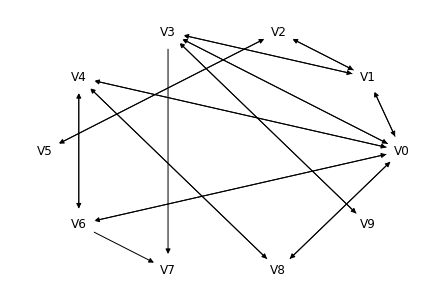

In [14]:
predicted_graph = discover.predict(data)
_draw(predicted_graph)

## Evaluation

Import evaluation metrics.

In [15]:
from cdt.metrics import (precision_recall, SID, SHD)

Compute the metrics given the true and predicted graphs.

In [16]:
scores = {
    "Area Under the precision/recall Curve (AUC)": precision_recall(true_graph, predicted_graph)[0],
    "Structural Hamming Distance (SHD)": SHD(true_graph, predicted_graph),
    "Structural Intervention Distance (SID)": int(SID(true_graph, predicted_graph)),
}
scores

{'Area Under the precision/recall Curve (AUC)': 0.7083333333333334,
 'Structural Hamming Distance (SHD)': 14,
 'Structural Intervention Distance (SID)': 58}